In [1]:
#https://www.fs.usda.gov/rds/archive/products/RDS-2013-0009.4/_metadata_RDS-2013-0009.4.html#Spatial_Reference_Information
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Need breakdown of fires started by humans and the size of fire
# Questons: What predicts the size of the fire? Location, duration, cause?

In [2]:
conn = sqlite3.connect('FPA_FOD_20170508.sqlite')

In [3]:
c = conn.cursor()

In [4]:
cursor = conn.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = [
        v[0] for v in cursor.fetchall()
        if v[0] != "sqlite_sequence"
    ]
cursor.close()
print(tables)

['spatial_ref_sys', 'spatialite_history', 'geometry_columns', 'spatial_ref_sys_aux', 'views_geometry_columns', 'virts_geometry_columns', 'geometry_columns_statistics', 'views_geometry_columns_statistics', 'virts_geometry_columns_statistics', 'geometry_columns_field_infos', 'views_geometry_columns_field_infos', 'virts_geometry_columns_field_infos', 'geometry_columns_time', 'geometry_columns_auth', 'views_geometry_columns_auth', 'virts_geometry_columns_auth', 'sql_statements_log', 'SpatialIndex', 'ElementaryGeometries', 'KNN', 'Fires', 'idx_Fires_Shape', 'idx_Fires_Shape_node', 'idx_Fires_Shape_rowid', 'idx_Fires_Shape_parent', 'NWCG_UnitIDActive_20170109']


In [4]:
df = pd.read_sql_query("select * from Fires", conn)
df.drop('Shape',axis=1, inplace=True)
df.head()

,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,...,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME
0,1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,0511,Plumas National Forest,...,0.10,A,40.036944,-121.005833,5.0,USFS,CA,63,063,Plumas
1,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,0.25,A,38.933056,-120.404444,5.0,USFS,CA,61,061,Placer
2,3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,0.10,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17,017,El Dorado
3,4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,0.10,A,38.559167,-119.913333,5.0,USFS,CA,3,003,Alpine
4,5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,0.10,A,38.559167,-119.933056,5.0,USFS,CA,3,003,Alpine


In [16]:
df.columns

Index(['OBJECTID', 'FOD_ID', 'FPA_ID', 'SOURCE_SYSTEM_TYPE', 'SOURCE_SYSTEM',
       'NWCG_REPORTING_AGENCY', 'NWCG_REPORTING_UNIT_ID',
       'NWCG_REPORTING_UNIT_NAME', 'SOURCE_REPORTING_UNIT',
       'SOURCE_REPORTING_UNIT_NAME', 'LOCAL_FIRE_REPORT_ID',
       'LOCAL_INCIDENT_ID', 'FIRE_CODE', 'FIRE_NAME',
       'ICS_209_INCIDENT_NUMBER', 'ICS_209_NAME', 'MTBS_ID', 'MTBS_FIRE_NAME',
       'COMPLEX_NAME', 'FIRE_YEAR', 'DISCOVERY_DATE', 'DISCOVERY_DOY',
       'DISCOVERY_TIME', 'STAT_CAUSE_CODE', 'STAT_CAUSE_DESCR', 'CONT_DATE',
       'CONT_DOY', 'CONT_TIME', 'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'LATITUDE',
       'LONGITUDE', 'OWNER_CODE', 'OWNER_DESCR', 'STATE', 'COUNTY',
       'FIPS_CODE', 'FIPS_NAME'],
      dtype='object')

In [12]:
df.drop('Shape', axis=1, inplace=True)

In [13]:
df[df['FIRE_SIZE_CLASS']=='G'].head()

,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,...,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME
16,17,17,FS-1418878,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,16823.0,G,38.523333,-120.211667,5.0,USFS,CA,5,005,Amador
17,18,18,FS-1418881,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,7700.0,G,38.780000,-120.260000,5.0,USFS,CA,17,017,El Dorado
188,189,192,FS-1419313,FED,FS-FIRESTAT,FS,USAZTNF,Tonto National Forest,0312,Tonto National Forest,...,16100.0,G,33.723333,-111.275000,5.0,USFS,AZ,7,007,Gila
1505,1506,1520,FS-1422195,FED,FS-FIRESTAT,FS,USNMGNF,Gila National Forest,0306,Gila National Forest,...,11936.0,G,33.613333,-108.558889,5.0,USFS,NM,3,003,Catron
1588,1589,1603,FS-1422367,FED,FS-FIRESTAT,FS,USCOPSF,Pike and San Isabel National Forest,0212,Pike San Isabel National Forest,...,11357.0,G,38.169722,-105.038056,5.0,USFS,CO,None,None,None


In [14]:
df['FIRE_SIZE_CLASS'].value_counts()

B    939376
A    666919
C    220077
D     28427
E     14107
F      7786
G      3773
Name: FIRE_SIZE_CLASS, dtype: int64

In [17]:
df['STATE'].value_counts()

CA    189550
GA    168867
TX    142021
NC    111277
FL     90261
SC     81315
NY     80870
MS     79230
AZ     71586
AL     66570
OR     61088
MN     44769
OK     43239
MT     40767
NM     37478
ID     36698
CO     34157
WA     33513
WI     31861
AR     31663
TN     31154
SD     30963
UT     30725
LA     30013
KY     27089
NJ     25949
PR     22081
WV     21967
VA     21833
MO     17953
NV     16956
ND     15201
WY     14166
ME     13150
AK     12843
MI     10502
HI      9895
PA      8712
NE      7973
KS      7673
CT      4976
IA      4134
MD      3622
OH      3479
MA      2626
NH      2452
IL      2327
IN      2098
RI       480
VT       456
DE       171
DC        66
Name: STATE, dtype: int64

In [18]:
df['STAT_CAUSE_CODE'].value_counts()

5.0     429028
9.0     323805
7.0     281455
1.0     278468
13.0    166723
2.0     147612
4.0      76139
8.0      61167
3.0      52869
6.0      33455
11.0     14448
10.0     11500
12.0      3796
Name: STAT_CAUSE_CODE, dtype: int64

In [19]:
df['STAT_CAUSE_DESCR'].value_counts()

Debris Burning       429028
Miscellaneous        323805
Arson                281455
Lightning            278468
Missing/Undefined    166723
Equipment Use        147612
Campfire              76139
Children              61167
Smoking               52869
Railroad              33455
Powerline             14448
Fireworks             11500
Structure              3796
Name: STAT_CAUSE_DESCR, dtype: int64

<AxesSubplot:xlabel='STAT_CAUSE_CODE'>

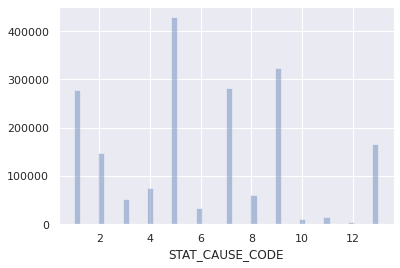

In [35]:
sns.set()
sns.distplot(df['STAT_CAUSE_CODE'],kde=False)

Text(0, 0.5, 'Count of Cause')

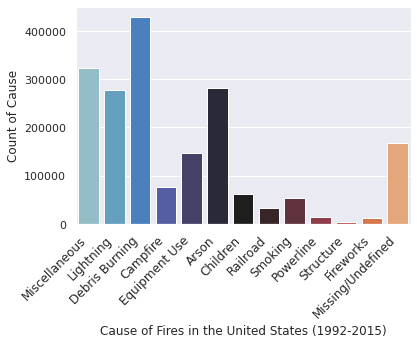

In [31]:
sns.set()
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='normal',
    fontsize='medium'  
)
sns.countplot(x='STAT_CAUSE_DESCR', data=df, palette='icefire')
plt.xlabel('Cause of Fires in the United States (1992-2015)')
plt.ylabel('Number of Fires')
plt.title('Cause by Number of Fires')

In [5]:
df_years = pd.DataFrame(df['FIRE_YEAR'].value_counts())
df_years.rename(columns={"FIRE_YEAR": "fire_count"}, inplace=True)
df_years

,fire_count
2006,114004
2000,96416
2007,95573
2011,90552
1999,89363
2005,88604
2001,86587
2008,85378
2010,79889
2009,78325


<AxesSubplot:>

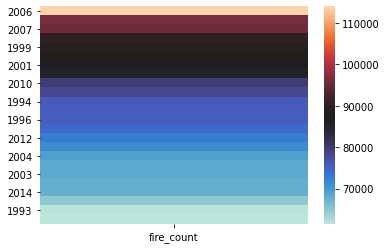

In [6]:
sns.heatmap(df_years,cmap='icefire')bar

In [12]:
fires = df[['FIRE_YEAR', 'STAT_CAUSE_DESCR']]
fires['count'] = 1
fires.rename(columns={"STAT_CAUSE_DESCR": "Cause"}, inplace=True)
fires

/home/matt/.local/share/virtualenvs/Wildfires-Fj3VjvPf/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/matt/.local/share/virtualenvs/Wildfires-Fj3VjvPf/lib/python3.7/site-packages/pandas/core/frame.py:4303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,FIRE_YEAR,Cause,count
0,2005,Miscellaneous,1
1,2004,Lightning,1
2,2004,Debris Burning,1
3,2004,Lightning,1
4,2004,Lightning,1
...,...,...,...
1880460,2015,Missing/Undefined,1
1880461,2015,Miscellaneous,1
1880462,2015,Missing/Undefined,1
1880463,2015,Missing/Undefined,1


In [15]:
pvfires = fires.groupby(by=['FIRE_YEAR', 'Cause']).count()['count'].unstack()
pvfires

Cause,Arson,Campfire,Children,Debris Burning,Equipment Use,Fireworks,Lightning,Miscellaneous,Missing/Undefined,Powerline,Railroad,Smoking,Structure
FIRE_YEAR,,,,,,,,,,,,,
1992,11162,2570,2916,12729,5633,213,12230,7364,8366,128,1999,2618,47
1993,10945,2767,2501,12353,5516,243,7539,6848,8826,133,1844,2420,54
1994,10080,3726,3201,14845,5429,413,16204,7070,10183,144,1965,2628,67
1995,12648,3987,3310,16719,5594,202,8075,7297,8360,154,2142,2895,89
1996,10206,4038,3039,16827,6028,322,12634,7115,9764,166,2896,2454,85
1997,10936,2490,2884,14750,5744,276,8447,9663,1816,180,2177,1971,116
1998,14103,2661,3109,15111,6027,306,10880,9334,2079,371,1873,2406,110
1999,19282,3266,3517,22343,7643,330,11797,12408,2509,364,2524,3250,130
2000,17827,2723,3492,21790,6608,292,16547,19037,1423,351,3143,3047,136


Text(30.5, 0.5, 'Year')

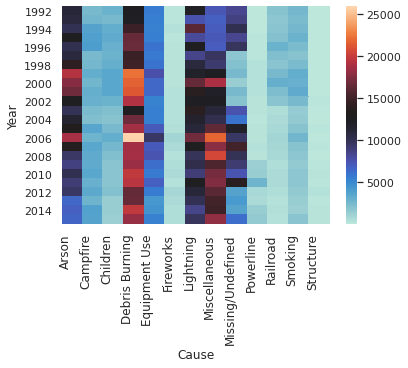

In [16]:
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='normal',
    fontsize='medium'  
)
sns.heatmap(data=pvfires, cmap='icefire')
plt.xlabel('Cause')
plt.ylabel('Year')
plt.title('Cause by Year')

In [18]:
pivot = fires.groupby(by=['FIRE_YEAR', 'Cause']).count()
pivot

count
FIRE_YEAR Cause                   
1992      Arson              11162
          Campfire            2570
          Children            2916
          Debris Burning     12729
          Equipment Use       5633
...                            ...
2015      Missing/Undefined   6276
          Powerline           1580
          Railroad             370
          Smoking             1884
          Structure            335

[312 rows x 1 columns]

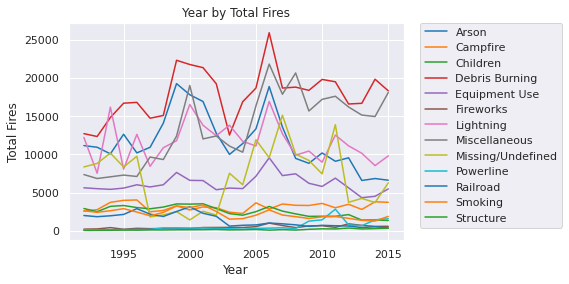

In [19]:
sns.lineplot(x='FIRE_YEAR',y='count',data=pivot.reset_index(),hue='Cause',palette='tab10')
plt.xlabel('Year')
plt.ylabel('Total Fires')
plt.title('Year by Total Fires')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [9]:
df[(df['STATE']=='CA') & (df['STAT_CAUSE_DESCR']=='Arson') & (df['FIRE_YEAR']==2015)]

,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,...,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME
1790583,1790584,300201850,FS-6315503,FED,FS-FIRESTAT,FS,USCALNF,Lassen National Forest,0506,Lassen National Forest,...,1.00,B,40.778333,-121.523333,8.0,PRIVATE,CA,089,089,Shasta
1790628,1790629,300201895,FS-6341131,FED,FS-FIRESTAT,FS,USCALPF,Los Padres National Forest,0507,Los Padres National Forest,...,0.56,B,36.010278,-121.434722,5.0,USFS,CA,053,053,Monterey
1790638,1790639,300201905,FS-6315062,FED,FS-FIRESTAT,FS,USCAMNF,Mendocino National Forest,0508,Mendocino National Forest,...,0.20,A,39.207222,-122.821667,8.0,PRIVATE,CA,033,033,Lake
1790775,1790776,300202043,FS-6314736,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,0511,Plumas National Forest,...,3.00,B,40.036389,-121.004444,5.0,USFS,CA,063,063,Plumas
1791124,1791125,300202401,FS-6351603,FED,FS-FIRESTAT,FS,USCATNF,Tahoe National Forest,0517,Tahoe National Forest,...,0.10,A,39.313333,-120.585833,8.0,PRIVATE,CA,061,061,Placer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880432,1880433,300348204,2015CAIRS27044479,NONFED,ST-CACDF,ST/C&L,USCASHU,Shasta-Trinity Unit,CASHU,Shasta-Trinity Unit,...,0.10,A,40.714702,-122.336489,13.0,STATE OR PRIVATE,CA,None,None,None
1880440,1880441,300348248,2015CAIRS28587133,NONFED,ST-CACDF,ST/C&L,USCALAC,Los Angeles County Fire Department,CALAC,Los Angeles County Fire Department,...,0.11,A,34.716666,-118.800000,13.0,STATE OR PRIVATE,CA,None,None,None
1880446,1880447,300348260,2015CAIRS29015247,NONFED,ST-CACDF,ST/C&L,USCABDU,San Bernardino Unit,CABDU,CDF - San Bernardino Unit,...,0.50,B,34.244444,-116.658889,15.0,UNDEFINED FEDERAL,CA,None,None,None
1880450,1880451,300348290,2015CAIRS27653046,NONFED,ST-CACDF,ST/C&L,USCASCU,Santa Clara Unit,CASCU,Santa Clara Unit,...,0.10,A,38.041150,-121.985283,15.0,UNDEFINED FEDERAL,CA,None,None,None


In [8]:
biggest_fires = df[df['FIRE_SIZE_CLASS']=='G']
biggest_fires.head()

,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,...,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME
16,17,17,FS-1418878,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,16823.0,G,38.523333,-120.211667,5.0,USFS,CA,5,005,Amador
17,18,18,FS-1418881,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,7700.0,G,38.780000,-120.260000,5.0,USFS,CA,17,017,El Dorado
188,189,192,FS-1419313,FED,FS-FIRESTAT,FS,USAZTNF,Tonto National Forest,0312,Tonto National Forest,...,16100.0,G,33.723333,-111.275000,5.0,USFS,AZ,7,007,Gila
1505,1506,1520,FS-1422195,FED,FS-FIRESTAT,FS,USNMGNF,Gila National Forest,0306,Gila National Forest,...,11936.0,G,33.613333,-108.558889,5.0,USFS,NM,3,003,Catron
1588,1589,1603,FS-1422367,FED,FS-FIRESTAT,FS,USCOPSF,Pike and San Isabel National Forest,0212,Pike San Isabel National Forest,...,11357.0,G,38.169722,-105.038056,5.0,USFS,CO,None,None,None


/home/matt/.local/share/virtualenvs/Wildfires-Fj3VjvPf/lib/python3.7/site-packages/seaborn/categorical.py:2989: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
/home/matt/.local/share/virtualenvs/Wildfires-Fj3VjvPf/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 86.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/matt/.local/share/virtualenvs/Wildfires-Fj3VjvPf/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 96.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/matt/.local/share/virtualenvs/Wildfires-Fj3VjvPf/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 91.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning

Text(0.5, 1.0, 'Cause by Fires >5,000 Acres')

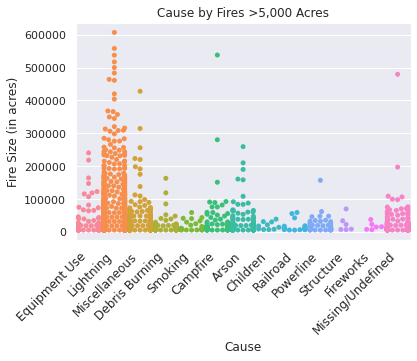

In [17]:
sns.set()
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='normal',
    fontsize='medium'  
)
sns.swarmplot(x='STAT_CAUSE_DESCR', y='FIRE_SIZE', data=biggest_fires, split=True)
plt.xlabel('Cause')
plt.ylabel('Fire Size (in acres)')
plt.title('Cause by Fires >5,000 Acres')